In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline 


In [2]:
# load our dataset 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
train.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001702,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [6]:
# checking for null values 
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:


train['Gender']=train['Gender'].fillna(train['Gender'].mode()[0])
train['Married']=train['Married'].fillna(train['Married'].mode()[0])
train['Dependents']=train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed']=train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])

train['LoanAmount']=train['LoanAmount'].fillna(train['LoanAmount'].mean())
train['Loan_Amount_Term']=train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean())
train['Credit_History']=train['Credit_History'].fillna(train['Credit_History'].mean())




train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
test['Gender']=test['Gender'].fillna(test['Gender'].mode()[0])
test['Married']=test['Married'].fillna(test['Married'].mode()[0])
test['Dependents']=test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed']=test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])

test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean())
test['Credit_History']=test['Credit_History'].fillna(test['Credit_History'].mean())


### EDA


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

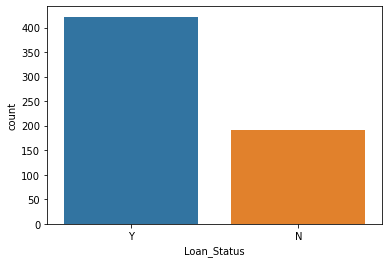

In [9]:
# let us have a look at the loan_approval status 
sns.countplot(train['Loan_Status'])

In [10]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
# from this countplot we can see that a large number of the application loan status was approved 
# next , lets have a look at how the other features relate with our target variable 
train.groupby(['Gender','Loan_Status']).mean()

ApplicantIncome  CoapplicantIncome  LoanAmount  \
Gender Loan_Status                                                   
Female N                4091.351351        1682.783784  129.173302   
       Y                4915.853333         824.453333  126.264324   
Male   N                5769.464516        1924.361290  156.142720   
       Y                5485.268012        1651.504092  148.258529   

                    Loan_Amount_Term  Credit_History  
Gender Loan_Status                                    
Female N                  350.756757        0.563303  
       Y                  352.640000        0.965626  
Male   N                  342.387097        0.561977  
       Y                  338.593660        0.970430

In [12]:
#grouping our categorical columns 
cat_cols = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

In [13]:
#mapping_factor = {'N':0,'Y':1}
#train['Loan_Status']= train['Loan_Status'].map(mapping_factor)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [14]:
# Separating our datasets
X= train.drop('Loan_Status',axis=1)
y=train['Loan_Status']

In [15]:
# declaring our categorical features 
print(X.dtypes)

categorical_features_indices = np.where(X.dtypes == 'object')[0]

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object


In [16]:
print(categorical_features_indices)

[ 0  1  2  3  4  5 11]


In [17]:
# Data splitting 
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.75, random_state=42)

X_test = test

In [18]:
from catboost import CatBoostClassifier, Pool, metrics, cv

### Model Training

In [19]:
# Basic model
model = CatBoostClassifier(
    custom_loss=['Logloss','Accuracy'],
    random_seed=42,
    logging_level='Silent'
)

In [20]:
model.fit(
    X_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(X_validation, y_validation),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [21]:
cv_params = model.get_params()
print(cv_params)

{'random_seed': 42, 'logging_level': 'Silent', 'custom_loss': ['Logloss', 'Accuracy']}


In [22]:
## attempting cross-validation

cv_params.update({'loss_function': metrics.Logloss() })

cv_data = cv(
    Pool(X, y, cat_features=categorical_features_indices),
    cv_params,
    nfold = 5,
    iterations= 1200,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [23]:
cv_data.head()

,iterations,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std,test-Accuracy-mean,test-Accuracy-std,train-Accuracy-mean,train-Accuracy-std
0,0,0.679553,0.002584,0.678336,0.001868,0.788181,0.024644,0.807417,0.014597
1,1,0.666544,0.002729,0.664757,0.002190,0.807853,0.016169,0.811888,0.004266
2,2,0.653695,0.002921,0.651359,0.002844,0.809492,0.017981,0.809856,0.004779
3,3,0.641713,0.003088,0.639109,0.003574,0.809492,0.017981,0.809449,0.004523
4,4,0.630387,0.003662,0.626767,0.004152,0.809492,0.017981,0.809449,0.004523


In [24]:
print('Best validation Accuracy score is: {:.2f}±{:.2f} on step {}'.format(
    np.max(cv_data['test-Accuracy-mean']),
    cv_data['test-Accuracy-std'][np.argmax(cv_data['test-Accuracy-mean'])],
    np.argmax(cv_data['test-Accuracy-mean'])
))

Best validation Accuracy score is: 0.81±0.02 on step 127


In [25]:
print('Precise  Accuracy score: {}'.format(np.max(cv_data['test-Accuracy-mean'])))

Precise  Accuracy score: 0.8095187731359068


In [26]:
# Model applying 
predictions = model.predict(X_test)
predictions_probs = model.predict_proba(X_test)[:,1]
print(predictions[:10])
print(predictions_probs[:10])

['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y']
[0.74227972 0.78286132 0.7607973  0.75230905 0.70589726 0.74861158
 0.83295674 0.12101921 0.76891256 0.83922705]


In [27]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [29]:
submission['Loan_Status']= predictions
submission.to_csv('Sub.csv',index=False)

### CatBoost Features

In [41]:
params = {
    'iterations': 900,
    'learning_rate': 0.15,
    'eval_metric': metrics.Accuracy(),
    'random_seed': 42,
    'logging_level': 'Silent',
    'use_best_model': False
}
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
validate_pool = Pool(X_validation, y_validation, cat_features=categorical_features_indices)

In [42]:
from sklearn.metrics import auc, classification_report, roc_auc_score
from sklearn.metrics import accuracy_score

model = CatBoostClassifier(**params)
model.fit(train_pool, eval_set=validate_pool)


best_model_params = params.copy()
best_model_params.update({
    'use_best_model': True
})
best_model = CatBoostClassifier(**best_model_params)
best_model.fit(train_pool, eval_set=validate_pool);


print('Simple model validation accuracy: {:.4}'.format(accuracy_score(y_validation, model.predict(X_validation))))
print('')

print('Best model validation accuracy: {:.4}'.format( accuracy_score(y_validation, best_model.predict(X_validation))))

Simple model validation accuracy: 0.7597

Best model validation accuracy: 0.7922


In [43]:
predictions = best_model.predict(X_test)

In [44]:
# 2nd Attempt
submission['Loan_Status']= predictions
submission.to_csv('Sub.csv',index=False)

In [45]:
## attempting early stopping parameters

earlystop_params = params.copy()
earlystop_params.update({
    'od_type': 'Iter', # overfitting detector
    'od_wait': 40
})
earlystop_model = CatBoostClassifier(**earlystop_params)
earlystop_model.fit(train_pool, eval_set=validate_pool);

print('Best model validation accuracy: {:.4}'.format( accuracy_score(y_validation, earlystop_model.predict(X_validation))))

Best model validation accuracy: 0.7662


In [46]:
print('Simple model tree count: {}'.format(model.tree_count_))
print('Simple model validation accuracy: {:.4}'.format(
    accuracy_score(y_validation, model.predict(X_validation))
))
print('')

print('Early-stopped model tree count: {}'.format(earlystop_model.tree_count_))
print('Early-stopped model validation accuracy: {:.4}'.format(
    accuracy_score(y_validation, earlystop_model.predict(X_validation))
))

Simple model tree count: 900
Simple model validation accuracy: 0.7597

Early-stopped model tree count: 93
Early-stopped model validation accuracy: 0.7662
